## Task 1: Dataset Selection

#### Connect Kaggle into Google Colab

Authenticate Kaggle API

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Download dataset using Kaggle dataset link/identifier

In [9]:
!kaggle datasets download -d threnjen/2019-airline-delays-and-cancellations

Dataset URL: https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations
License(s): U.S. Government Works
 97% 732M/754M [00:07<00:00, 222MB/s]
100% 754M/754M [00:07<00:00, 107MB/s]


Unzip the dataset

In [10]:
!unzip 2019-airline-delays-and-cancellations.zip

Archive:  2019-airline-delays-and-cancellations.zip
  inflating: full_data_flightdelay.csv  
  inflating: raw_data/AIRPORT_COORDINATES.csv  
  inflating: raw_data/B43_AIRCRAFT_INVENTORY.csv  
  inflating: raw_data/CARRIER_DECODE.csv  
  inflating: raw_data/GHCND_documentation.pdf  
  inflating: raw_data/ONTIME_REPORTING_01.csv  
  inflating: raw_data/ONTIME_REPORTING_02.csv  
  inflating: raw_data/ONTIME_REPORTING_03.csv  
  inflating: raw_data/ONTIME_REPORTING_04.csv  
  inflating: raw_data/ONTIME_REPORTING_05.csv  
  inflating: raw_data/ONTIME_REPORTING_06.csv  
  inflating: raw_data/ONTIME_REPORTING_07.csv  
  inflating: raw_data/ONTIME_REPORTING_08.csv  
  inflating: raw_data/ONTIME_REPORTING_09.csv  
  inflating: raw_data/ONTIME_REPORTING_10.csv  
  inflating: raw_data/ONTIME_REPORTING_11.csv  
  inflating: raw_data/ONTIME_REPORTING_12.csv  
  inflating: raw_data/ONTIME_REPORTING_2020_01.csv  
  inflating: raw_data/ONTIME_REPORTING_2020_02.csv  
  inflating: raw_data/ONTIME_REPORT

In [11]:
!ls

2019-airline-delays-and-cancellations.zip  sample_data
full_data_flightdelay.csv		   test.csv
kaggle.json				   train.csv
raw_data				   train_sets_documentation.txt
raw_data_documentation.txt


**Dataset**: 2019 Airline Delays and Cancellations\
**Source**: Kaggle - threnjen/2019-airline-delays-and-cancellations
Size: ~730MB\
**Domain**: Transportation / Aviation

**Used file**: full_data_flightdelay.csv (size:1.27G)

## Task 2: Load and Inspect Data

Import relevant libraries/frameworks

In [12]:
import pandas as pd
import time
import psutil
import os

file_path = '/content/full_data_flightdelay.csv'

*   Load the dataset into Google Colab

---


*   Calculate execution time and memory used

In [13]:
# Start Time
start_time = time.time()
process = psutil.Process(os.getpid())
start_memory = process.memory_info().rss / 1024 ** 2


df = pd.read_csv(file_path)

# End Time
end_time = time.time()
end_memory = process.memory_info().rss / 1024 ** 2

execution_time_normal = end_time - start_time
memory_used_normal = end_memory - start_memory

print(f"Execution Time: {execution_time_normal:.2f} seconds")
print(f"Memory Used: {memory_used_normal:.2f} MB")

Execution Time: 35.45 seconds
Memory Used: 3961.75 MB


Find relevant information(shape, columns names, datatypes)

In [14]:
print("Shape (Rows, Columns):")
print(df.shape)

print()
print("nColumn Names:")
print(df.columns.tolist())

print()
print("nData Types:")
print(df.dtypes)

Shape (Rows, Columns):
(6489062, 26)

nColumn Names:
['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP', 'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE', 'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']

nData Types:
MONTH                              int64
DAY_OF_WEEK                        int64
DEP_DEL15                          int64
DEP_TIME_BLK                      object
DISTANCE_GROUP                     int64
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                      object
AIRPORT_FLIGHTS_MONTH              int64
AIRLINE_FLIGHTS_MONTH              int64
AIRLINE_AIRPORT_FLIGHTS_MO

## Task 3: Apply Big Data Handling Strategies

### 1. Load Less Data

<h4>Columns selected: </h4>

* MONTH
* DAY_OF_WEEK
* DEP_DEL15
* CONCURRENT_FLIGHTS
* CARRIER_NAME
* AIRPORT_FLIGHTS_MONTH
* AIRLINE_FLIGHTS_MONTH
* PREVIOUS_AIRPORT
* AWND

In [15]:
columns = ['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'CONCURRENT_FLIGHTS',
                  'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
                  'PREVIOUS_AIRPORT', 'AWND']

# Start Time
start_time = time.time()
process = psutil.Process(os.getpid())
start_memory = process.memory_info().rss / 1024 ** 2

df1 = pd.read_csv(file_path, usecols=columns)

# End Time
end_time = time.time()
end_memory = process.memory_info().rss / 1024 ** 2

execution_time_1 = end_time - start_time
memory_used_1 = end_memory - start_memory

print(f"Execution Time: {execution_time_1:.2f} seconds")
print(f"Memory Used: {memory_used_1:.2f} MB")

Execution Time: 19.09 seconds
Memory Used: 695.13 MB


### 2. Use Chunking

<h4> Chunking using Pandas </h4>

In [16]:
print("Original shape:", df.shape)
print()

chunksize = 100000
chunk_iter = pd.read_csv(file_path, chunksize=chunksize)

# Start Time
start_time = time.time()
process = psutil.Process(os.getpid())
start_memory = process.memory_info().rss / 1024 ** 2

for i, chunk in enumerate(chunk_iter):
    print(f"Chunk {i+1}: {chunk.shape}")
    # Example: summarize a column
    print(chunk['MONTH'].value_counts().head())
    print()
    if i == 2:
        break

# End Time
end_time = time.time()
end_memory = process.memory_info().rss / 1024 ** 2

execution_time_2 = end_time - start_time
memory_used_2 = end_memory - start_memory

print(f"Execution Time: {execution_time_2:.2f} seconds")
print(f"Memory Used: {memory_used_2:.2f} MB")

Original shape: (6489062, 26)

Chunk 1: (100000, 26)
MONTH
1    100000
Name: count, dtype: int64

Chunk 2: (100000, 26)
MONTH
1    100000
Name: count, dtype: int64

Chunk 3: (100000, 26)
MONTH
1    100000
Name: count, dtype: int64

Execution Time: 1.53 seconds
Memory Used: 0.00 MB


### 3. Optimize Data Types


In [17]:
dtypes_optimized = {
    'MONTH': 'int8',
    'DAY_OF_WEEK': 'int8',
    'DEP_DEL15': 'int8',
    'DEP_TIME_BLK': 'category',
    'DISTANCE_GROUP': 'int8',
    'SEGMENT_NUMBER': 'int16',
    'CONCURRENT_FLIGHTS': 'int16',
    'NUMBER_OF_SEATS': 'int16',
    'CARRIER_NAME': 'category',
    'AIRPORT_FLIGHTS_MONTH': 'int32',
    'AIRLINE_FLIGHTS_MONTH': 'int32',
    'AIRLINE_AIRPORT_FLIGHTS_MONTH': 'int32',
    'AVG_MONTHLY_PASS_AIRPORT': 'int32',
    'AVG_MONTHLY_PASS_AIRLINE': 'int32',
    'FLT_ATTENDANTS_PER_PASS': 'float32',
    'GROUND_SERV_PER_PASS': 'float32',
    'PLANE_AGE': 'int8',
    'DEPARTING_AIRPORT': 'category',
    'LATITUDE': 'float32',
    'LONGITUDE': 'float32',
    'PREVIOUS_AIRPORT': 'category',
    'PRCP': 'float32',
    'SNOW': 'float32',
    'SNWD': 'float32',
    'TMAX': 'float32',
    'AWND': 'float32'
}

# Start Time
start_time = time.time()
process = psutil.Process(os.getpid())
start_memory = process.memory_info().rss / 1024 ** 2

df3 = pd.read_csv(file_path, dtype=dtypes_optimized)

# End time
end_time = time.time()
end_memory = process.memory_info().rss / (1024 * 1024)  # MB

execution_time_3 = end_time - start_time
memory_used_3 = end_memory - start_memory

print(df3.info())
print(df3.head())

print(f"Execution Time: {execution_time_3:.2f} seconds")
print(f"Memory Used: {memory_used_3:.2f} MB")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489062 entries, 0 to 6489061
Data columns (total 26 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   MONTH                          int8    
 1   DAY_OF_WEEK                    int8    
 2   DEP_DEL15                      int8    
 3   DEP_TIME_BLK                   category
 4   DISTANCE_GROUP                 int8    
 5   SEGMENT_NUMBER                 int16   
 6   CONCURRENT_FLIGHTS             int16   
 7   NUMBER_OF_SEATS                int16   
 8   CARRIER_NAME                   category
 9   AIRPORT_FLIGHTS_MONTH          int32   
 10  AIRLINE_FLIGHTS_MONTH          int32   
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int32   
 12  AVG_MONTHLY_PASS_AIRPORT       int32   
 13  AVG_MONTHLY_PASS_AIRLINE       int32   
 14  FLT_ATTENDANTS_PER_PASS        float32 
 15  GROUND_SERV_PER_PASS           float32 
 16  PLANE_AGE                      int8    
 17  DEPARTING_AIRPORT          

4. Sampling

In [18]:
# Start time
process = psutil.Process(os.getpid())
start_time = time.time()
start_memory = process.memory_info().rss / (1024 * 1024)  # MB

sample_fraction = 0.01  # 1%
df4 = pd.read_csv(file_path).sample(frac=sample_fraction, random_state=42)

# End time
end_time = time.time()
end_memory = process.memory_info().rss / (1024 * 1024)  # MB

print(df4.head())
print(f"Shape of Sampled Data: {df4.shape}")

execution_time_4 = end_time - start_time
memory_used_4 = end_memory - start_memory

print(f"Execution Time: {execution_time_4:.2f} seconds")
print(f"Memory Used: {memory_used_4:.2f} MB")

         MONTH  DAY_OF_WEEK  DEP_DEL15 DEP_TIME_BLK  DISTANCE_GROUP  \
984735       3            5          0    1500-1559               3   
4740332      9            7          0    2200-2259               5   
6361351     12            1          0    1900-1959               3   
4012189      8            3          0    1700-1759               6   
4789024      9            5          0    0800-0859               2   

         SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
984735                4                  27               69   
4740332               1                   7              128   
6361351               5                  15               76   
4012189               2                  22              276   
4789024               1                   3               76   

                   CARRIER_NAME  AIRPORT_FLIGHTS_MONTH  ...  PLANE_AGE  \
984735    Midwest Airline, Inc.                  11965  ...         11   
4740332  American Airlines Inc.         

### 5. Parallel Processing with Dask



In [ ]:
import dask.dataframe as dd
# Start time
process = psutil.Process(os.getpid())
start_time = time.time()
start_memory = process.memory_info().rss / (1024 * 1024)  # MB

# Load dataset with Dask
df_dask = dd.read_csv(file_path, usecols=columns)

df_dask = df_dask.compute()

end_time = time.time()
end_memory = process.memory_info().rss / (1024 * 1024)

# Calculate performance
execution_time_5 = end_time - start_time
memory_used_5 = end_memory - start_memory

print(df_dask.head())

print(f"Execution Time: {execution_time_5:.2f} seconds")
print(f"Memory Used: {memory_used_5:.2f} MB")

## Task 4: Comparative Analysis


### Comparative between step 1 - 5

* EXECUTION TIME
* STORAGE USED

In [20]:
# Create table
comparison_table = pd.DataFrame({
    'Step': ['Load Less Data',
             'Chunking',
             'Optimize Data Types',
             'Sampling',
             'Parallel with Dask'],
    'Execution Time (s)': [
        execution_time_1,
        execution_time_2,
        execution_time_3,
        execution_time_4,
        execution_time_5
    ],
    'Memory Used (MB)': [
        memory_used_1,
        memory_used_2,
        memory_used_3,
        memory_used_4,
        memory_used_5
    ]
})

print("📊 Step-by-Step Comparison (Execution Time & Memory)")
comparison_table

📊 Step-by-Step Comparison (Execution Time & Memory)


,Step,Execution Time (s),Memory Used (MB)
0,Load Less Data,19.094315,695.132812
1,Chunking,1.525865,0.000000
2,Optimize Data Types,35.734630,446.972656
3,Sampling,36.620373,44.558594
4,Parallel with Dask,21.385914,1245.949219


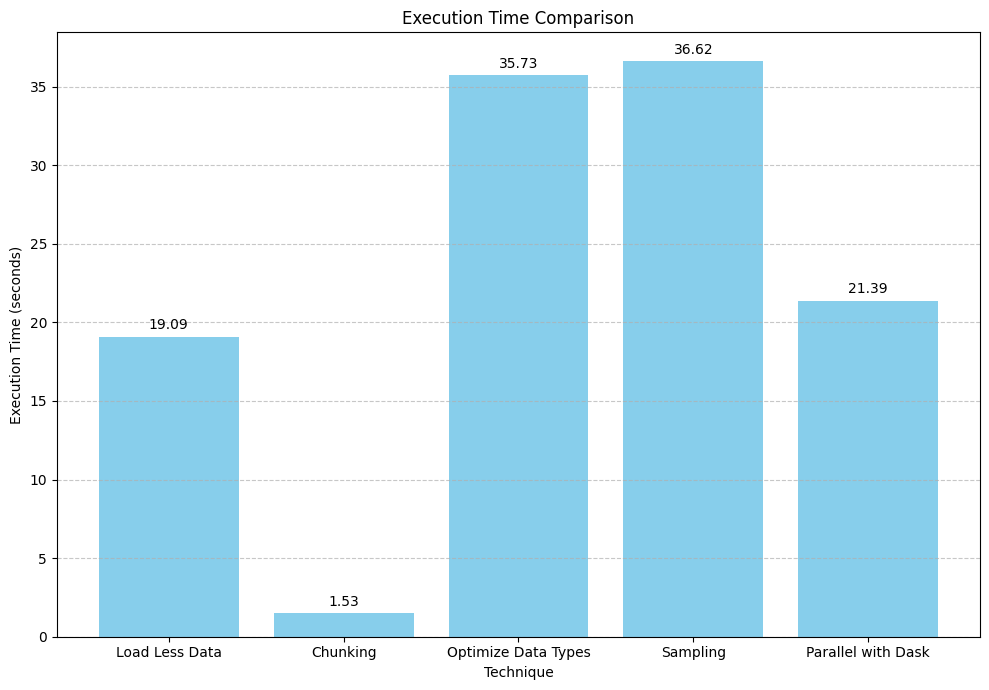

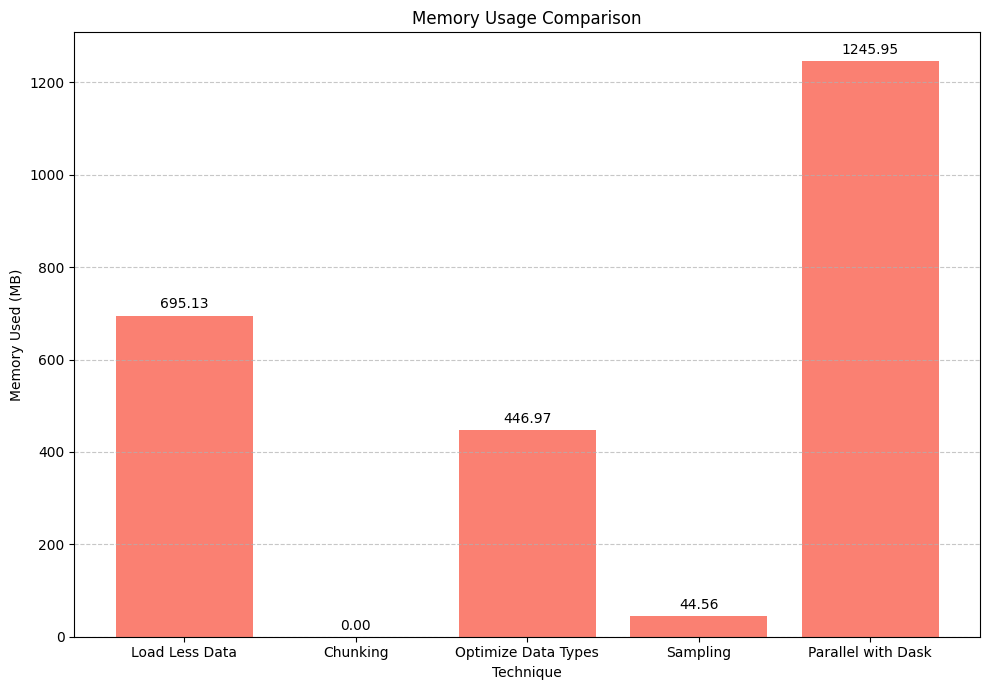

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Data
steps = comparison_table['Step'].tolist()
execution_times = comparison_table['Execution Time (s)'].tolist()
memory_used = comparison_table['Memory Used (MB)'].tolist()

x = np.arange(len(steps))  # Label locations

# Plot 1: Execution Time
fig1, ax1 = plt.subplots(figsize=(10, 7))
bars1 = ax1.bar(x, execution_times, color='skyblue')
ax1.set_title('Execution Time Comparison')
ax1.set_xlabel('Technique')
ax1.set_ylabel('Execution Time (seconds)')
ax1.set_xticks(x)
ax1.set_xticklabels(steps,  ha='center')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()

# Plot 2: Memory Used
fig2, ax2 = plt.subplots(figsize=(10, 7))
bars2 = ax2.bar(x, memory_used, color='salmon')
ax2.set_title('Memory Usage Comparison')
ax2.set_xlabel('Technique')
ax2.set_ylabel('Memory Used (MB)')
ax2.set_xticks(x)
ax2.set_xticklabels(steps,  ha='center')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Comparative between libraries (pandas, dask, polar)

In [22]:
import pandas as pd
df_pandas=pd.read_csv(file_path)
print("Shape of dataset before cleaning" + str(df_pandas.shape))
print("Total duplicated row:"+str(df_pandas.duplicated().sum()))
print("Total null each column: \n"+str(df_pandas.isnull().sum()))

Shape of dataset before cleaning(6489062, 26)
Total duplicated row:28473
Total null each column: 
MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                       

In [ ]:
import pandas as pd
import time
import psutil
import os

process = psutil.Process(os.getpid())
start_time = time.time()
start_memory = process.memory_info().rss / 1024**2

df_pandas=pd.read_csv(file_path)
df_pandas.drop_duplicates(inplace=True)

# Calculate delay rates by carrier and month
delay_analysis = (
    df_pandas.groupby(['MONTH', 'CARRIER_NAME'])
    .agg(
        total_flights=('DEP_DEL15', 'count'),
        delayed_flights=('DEP_DEL15', 'sum'),
        delay_rate=('DEP_DEL15', 'mean')
    )
    .reset_index()
    .sort_values(['MONTH', 'delay_rate'], ascending=[True, False])
)

# Add percentage column
delay_analysis['delay_pct'] = (delay_analysis['delay_rate'] * 100).round(1)

end_time = time.time()
end_memory = process.memory_info().rss / 1024**2

execution_time_6 = end_time - start_time
memory_used_6 = end_memory - start_memory

print(delay_analysis.shape)
print(delay_analysis.head(30))
print(f"\nExecution Time: {execution_time_6:.2f} seconds")
print(f"Memory Used: {memory_used_6:.2f} MB")

In [ ]:
import dask.dataframe as dd

process = psutil.Process(os.getpid())
start_time = time.time()
start_memory = process.memory_info().rss / 1024**2

df_dask = dd.read_csv(file_path)
df_dask=df_dask.drop_duplicates()


delay_analysis = (
    df_dask.groupby(['MONTH', 'CARRIER_NAME'])
    .agg({
        'DEP_DEL15': ['count', 'sum', 'mean']
    })
    .compute()
    .sort_values(['MONTH', ('DEP_DEL15', 'mean')], ascending=[True, False])
)

# Clean up multi-index columns
delay_analysis.columns = ['total_flights', 'delayed_flights', 'delay_rate']
delay_analysis['delay_pct'] = (delay_analysis['delay_rate'] * 100).round(1)

end_time = time.time()
end_memory = process.memory_info().rss / 1024**2

execution_time_7 = end_time - start_time
memory_used_7 = end_memory - start_memory

print(delay_analysis.shape)
print(delay_analysis.head(30))
print(f"\nExecution Time: {execution_time_7:.2f} seconds")
print(f"Memory Used: {memory_used_7:.2f} MB")

In [ ]:
import polars as pl

process = psutil.Process(os.getpid())
start_time = time.time()
start_memory = process.memory_info().rss / 1024**2

df_polars = pl.read_csv(file_path)

delay_analysis = (
    df_polars.lazy()
    .group_by(['MONTH', 'CARRIER_NAME'])
    .agg(
        pl.len().alias('total_flights'),
        pl.col('DEP_DEL15').sum().alias('delayed_flights'),
        pl.col('DEP_DEL15').mean().alias('delay_rate')
    )
    .sort(['MONTH', 'delay_rate'], descending=[False, True])
    .with_columns(
        (pl.col('delay_rate') * 100).round(1).alias('delay_pct')
    )
    .collect()
)

end_time = time.time()
end_memory = process.memory_info().rss / 1024**2

execution_time_8 = end_time - start_time
memory_used_8 = end_memory - start_memory

print(delay_analysis.shape)
print(delay_analysis.head(30))
print(f"\nExecution Time: {execution_time_8:.2f} seconds")
print(f"Memory Used: {memory_used_8:.2f} MB")

In [ ]:
comparison_table2 = pd.DataFrame({
    'Step': ['Pandas',
             'Dask',
             'Polars'],
    'Execution Time (s)': [
        execution_time_6,
        execution_time_7,
        execution_time_8
    ],
    'Memory Used (MB)': [
        memory_used_6,
        memory_used_7,
        memory_used_8
    ]
})

print("📊 Comparison of different libaries(Execution Time & Memory)")
comparison_table2

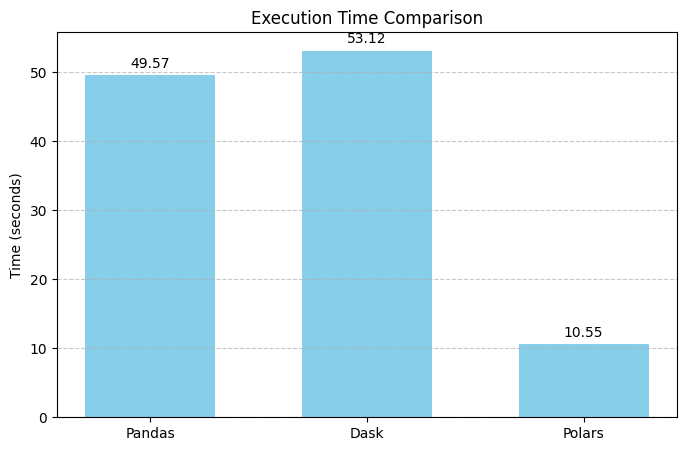

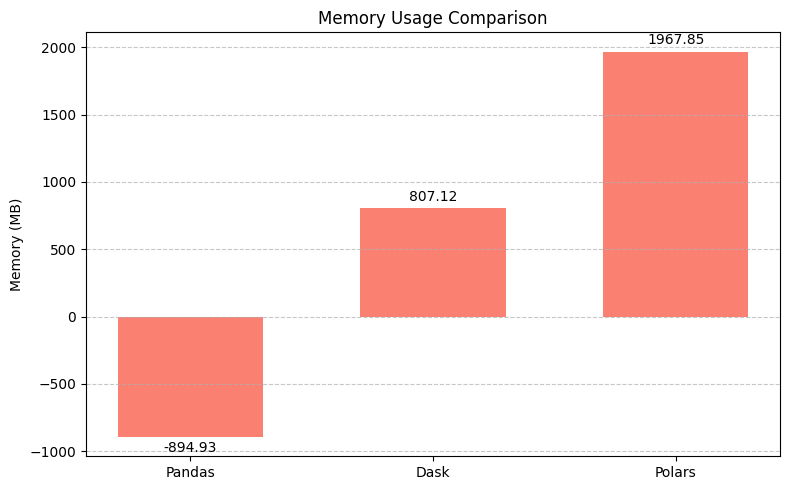

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Data
steps = comparison_table2['Step'].tolist()
execution_times = comparison_table2['Execution Time (s)'].tolist()
memory_used = comparison_table2['Memory Used (MB)'].tolist()

x = np.arange(len(steps))  # Label locations
width = 0.6

# --- Chart 1: Execution Time ---
fig1, ax1 = plt.subplots(figsize=(8, 5))
bars1 = ax1.bar(x, execution_times, width, color='skyblue')
ax1.set_title('Execution Time Comparison')
ax1.set_ylabel('Time (seconds)')
ax1.set_xticks(x)
ax1.set_xticklabels(steps)
ax1.bar_label(bars1, fmt='%.2f', padding=3)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# --- Chart 2: Memory Usage ---
fig2, ax2 = plt.subplots(figsize=(8, 5))
bars2 = ax2.bar(x, memory_used, width, color='salmon')
ax2.set_title('Memory Usage Comparison')
ax2.set_ylabel('Memory (MB)')
ax2.set_xticks(x)
ax2.set_xticklabels(steps)
ax2.bar_label(bars2, fmt='%.2f', padding=3)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Show plots
plt.tight_layout()
plt.show()
